# **Hệ thống phân tích hành vi mua sắm của khách hàng**


# Tiền xử lý dữ liệu

# Về bộ dữ liệu

## Giới thiệu

Tệp này chứa dữ liệu hành vi trong **5 tháng (tháng 10/2019 – tháng 2/2020)** từ một cửa hàng điện tử trực tuyến lớn.

Mỗi dòng trong tệp đại diện cho một sự kiện. Tất cả các sự kiện đều liên quan đến sản phẩm và người dùng. Mỗi sự kiện giống như một mối quan hệ nhiều-nhiều giữa sản phẩm và người dùng.

Dữ liệu được thu thập bởi dự án **Open CDP**. Bạn có thể thoải mái sử dụng nền tảng dữ liệu khách hàng mã nguồn mở này.
## Cách đọc dữ liệu

Có nhiều loại sự kiện khác nhau. Xem bên dưới.

**Cách hiểu dữ liệu:**

Ví dụ:  
Người dùng `user_id` trong phiên `user_session` đã **thêm vào giỏ hàng** (sự kiện `event_type` = `cart`) sản phẩm `product_id` thuộc thương hiệu `brand` trong danh mục `category_code`, với giá `price` vào thời điểm `event_time`.

---

## Cấu trúc tệp

| Thuộc tính      | Mô tả |
|-----------------|------|
| `event_time`      | Thời gian sự kiện xảy ra (theo UTC). |
| `event_type`      | Chỉ có một loại sự kiện: `purchase` (mua hàng). |
| `product_id`      | ID sản phẩm. |
| `category_id`     | ID danh mục sản phẩm. |
| `category_code`   | Phân loại sản phẩm (tên mã). Thường có cho các danh mục quan trọng, có thể bỏ qua cho phụ kiện. |
| `brand`           | Tên thương hiệu (chữ thường). Có thể bị thiếu. |
| `price`           | Giá sản phẩm (kiểu float). Luôn có. |
| `user_id`         | ID người dùng cố định. |
| `user_session`    | ID phiên làm việc tạm thời của người dùng. Mỗi phiên có ID riêng, sẽ thay đổi nếu người dùng rời khỏi và quay lại sau một thời gian dài. |

---

## Các loại sự kiện

- `view` - Người dùng đã xem sản phẩm
- `cart` - Người dùng thêm sản phẩm vào giỏ hàng
- `remove_from_cart` - Người dùng xóa sản phẩm khỏi giỏ hàng
- `purchase` - Người dùng mua sản phẩm

---

## Mua nhiều sản phẩm trong một phiên

Một phiên có thể có nhiều sự kiện mua hàng. Điều này hoàn toàn bình thường vì chúng đều thuộc một đơn hàng.

---

## Lời cảm ơn

Cảm ơn nền tảng tiếp thị **[REES46 Marketing Platform](https://rees46.com/)** đã cung cấp bộ dữ liệu này.

---

## Khám phá & Hiểu dữ liệu
### Tải dữ liệu

Đây là link tải tập dữ liệu: [https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store)

### Load dữ liệu vào Dataframe

In [241]:
import pandas as pd

data = pd.read_csv('events.csv')


### Xem 5 dòng đầu của dữ liệu

In [242]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


### Hiển thị thông tin tổng quan về DataFrame

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


DataFrame có 885,129 dòng và 9 cột, với một số cột chứa giá trị thiếu (null) như `category_code`, `brand`, và `user_session`. Cần xử lý các giá trị thiếu này.


### Trả về tất cả các giá trị duy nhất có trong cột `event_type` của DataFrame.

In [244]:
data["event_type"].unique()

array(['view', 'cart', 'purchase'], dtype=object)

Mảng trả về các giá trị duy nhất trong cột `event_type`, bao gồm các sự kiện `view`, `cart` và `purchase`. Nhưng không có sự kiện `remove_from_cart` như ban đầu được mô tả.

### Hiển thị các thống kê mô tả (mean, std, min, 25%, 50%, 75%, max) cho các cột số trong DataFrame.

Mô tả thống kê cột `price` cho thấy giá trị trung bình là 146.33, với độ lệch chuẩn khá lớn (296.81), giá trị thấp nhất là 0.22 và giá trị cao nhất là 64771.06.


## Làm sạch dữ liệu


### Tính tổng số giá trị thiếu (NaN) trong mỗi cột của DataFrame.

In [245]:
data.isna().sum() 

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

### Liệt kê event_type ở những sự kiện có user_session rỗng

In [246]:
data[data['user_session'].isna()]['event_type'].unique()

array(['view', 'cart'], dtype=object)

user_session chỉ thiếu 165 giá trị trên tổng số 885,129 dòng, tức là thiếu rất rất ít (~0.0186%). Và đặc biệt là chỉ là `view` và `cart` không làm ảnh hưởng đến **lợi nhuận** nên mình sẽ bỏ các dòng dữ liệu này.

### Xóa các dòng mà cột `user_session` không có giá trị

In [247]:
data = data.dropna(subset=['user_session'])

### Điền giá trị 'unknown' vào các ô bị thiếu trong cột `category_code` và `brand` của DataFrame.


In [248]:
# Điền category_code
data['category_code'] = data['category_code'].fillna('unknown')
# Điền brand
data['brand'] = data['brand'].fillna('unknown')

# Đếm giá trị thiếu
missing_values = data.isna().sum()
print(missing_values)


event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


## 	Biến đổi dữ liệu

### Chuyển đổi cột `event_time` thành kiểu dữ liệu datetime để dễ dàng xử lý thời gian.


In [249]:
data['event_time'] = pd.to_datetime(data['event_time'])

# kiểm tra lại kiểu dữ liệu
data.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

In [250]:
data.describe()

,product_id,category_id,price,user_id
count,8.849640e+05,8.849640e+05,884964.000000,8.849640e+05
mean,1.906619e+06,2.144423e+18,146.320109,1.515916e+18
std,1.458717e+06,6.165680e+14,296.793600,3.554126e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452884e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [251]:
data['year'] = data['event_time'].dt.year
data['month'] = data['event_time'].dt.month
data['day'] = data['event_time'].dt.day
data['quarter'] = data['event_time'].dt.quarter
data['week'] = data['event_time'].dt.isocalendar().week
data['weekday'] = data['event_time'].dt.weekday
data['dayofyear'] = data['event_time'].dt.dayofyear

data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,quarter,week,weekday,dayofyear
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,3,39,3,268
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,3,39,3,268
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,3,39,3,268
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,3,39,3,268
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,3,39,3,268


### Chuyển đổi các cột `product_id`, `category_id`, `user_id` sang kiểu dữ liệu `object`

Mục đích là chỉ để lại những cột kiểu số mang mục tiêu tính toán bởi vậy chuyển kiểu cho cột `product_id`, `category_id` và `user_id`.

In [252]:
data['product_id'] = data['product_id'].astype('object')
data['category_id'] = data['category_id'].astype('object')
data['user_id'] = data['user_id'].astype('object')

## Mở rộng dữ liệu 

### Kiểm tra số lượng cấp độ con tối đa trong `category_code`

In [253]:
# Check is category_code have more than 3 sub category exists
category_code_list = data['category_code']

maxSub = 0

for code in category_code_list:
    numSub = len(code.split('.'))
    if (maxSub < numSub): maxSub = numSub

print(maxSub)
# maximum number of subcategory is 4

4


Tối đa là 4 cấp nên mình sẽ chọn cách đơn giản là tạo ra 4 cột `category`, `sub_category`, `sub_sub_category`, và `sub_sub_sub_category`.

### Tách chúng thành 4 cột: `category`, `sub_category`, `sub_sub_category`, và `sub_sub_sub_category`.

In [254]:
data[['category', 'sub_category', 'sub_sub_category', 'sub_sub_sub_category']] = (
    pd.DataFrame([
        (category_code_list.get(idx, '0').split('.') + ['0', '0', '0', '0'])[:4]
        for idx in data.index
    ], index=data.index)
)


### Kiểm tra lại dữ liệu đã được mở rộng

In [255]:
print(data.dtypes)
data.head(10) 

event_time              datetime64[ns, UTC]
event_type                           object
product_id                           object
category_id                          object
category_code                        object
brand                                object
price                               float64
user_id                              object
user_session                         object
year                                  int32
month                                 int32
day                                   int32
quarter                               int32
week                                 UInt32
weekday                               int32
dayofyear                             int32
category                             object
sub_category                         object
sub_sub_category                     object
sub_sub_sub_category                 object
dtype: object


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,quarter,week,weekday,dayofyear,category,sub_category,sub_sub_category,sub_sub_sub_category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,3,39,3,268,electronics,telephone,0,0
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,3,39,3,268,computers,components,cooler,0
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,3,39,3,268,unknown,0,0,0
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,3,39,3,268,computers,peripherals,printer,0
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,3,39,3,268,unknown,0,0,0
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,2020,9,24,3,39,3,268,construction,tools,saw,0
6,2020-09-24 11:58:23+00:00,view,3791349,2144415935086199225,computers.desktop,unknown,215.41,1515915625519388877,J1t6sIYXiV,2020,9,24,3,39,3,268,computers,desktop,0,0
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw,2020,9,24,3,39,3,268,computers,network,router,0
8,2020-09-24 11:58:25+00:00,view,657859,2144415939431498289,unknown,unknown,34.17,1515915625519320570,HEl15U7JVy,2020,9,24,3,39,3,268,unknown,0,0,0
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39,2020,9,24,3,39,3,268,computers,network,router,0


### In ra số lượng giá trị duy nhất (nunique) trong từng cấp phân loại: `category`, `sub_category`, `sub_sub_category`, và `sub_sub_sub_category`.

In [256]:
print(
f'''
Categories: {data['category'].nunique()}
SubCategory: {data['sub_category'].nunique()}
SubSubCategory: {data['sub_sub_category'].nunique()}
SubSubSubCategory: {data['sub_sub_sub_category'].nunique()}
'''
)


Categories: 15
SubCategory: 43
SubSubCategory: 78
SubSubSubCategory: 2



### Lưu trữ dữ liệu đã làm sạch thành 1 file CSV mới

In [257]:
# Lưu dữ liệu đã xử lý vào file CSV
data.to_csv('events_processed.csv', index=False)

print("Đã lưu 'events_processed.csv'")

PermissionError: [Errno 13] Permission denied: 'events_processed.csv'

## Phân tích và trực quan hóa

### Dataset có bao nhiêu dòng, bao nhiêu user và bao nhiêu sản phẩm ?

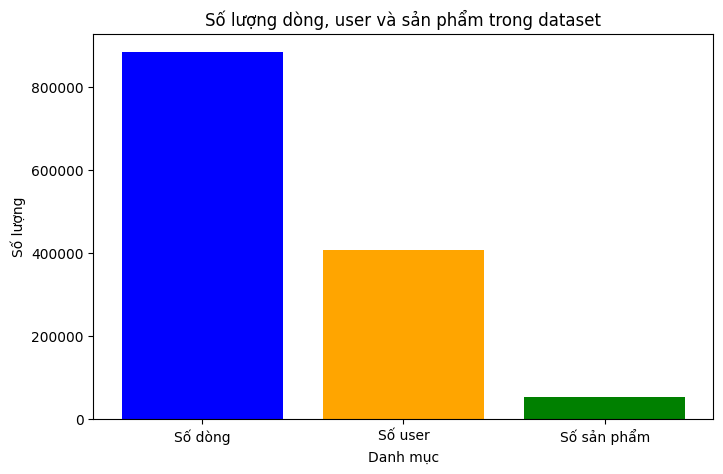

In [ ]:
import matplotlib.pyplot as plt

# Tính toán số lượng
num_rows = len(data)
num_users = data['user_id'].nunique()
num_products = data['product_id'].nunique()

# Chuẩn bị dữ liệu cho biểu đồ
categories = ['Số dòng', 'Số user', 'Số sản phẩm']
values = [num_rows, num_users, num_products]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange', 'green'])
plt.title('Số lượng dòng, user và sản phẩm trong dataset')
plt.ylabel('Số lượng')
plt.xlabel('Danh mục')
plt.show()

### Nhận xét biểu đồ

Biểu đồ trên cho thấy số lượng dòng dữ liệu, số lượng người dùng và số lượng sản phẩm trong dataset.
- **Số dòng**: Tổng số dòng dữ liệu là 884,964, đại diện cho các sự kiện.
- **Số user**: Có 407,237 người dùng duy nhất.
- **Số sản phẩm**: Có 53,452 sản phẩm duy nhất.

Điều này cho thấy dataset có quy mô lớn và đa dạng về người dùng cũng như sản phẩm.

### Thời gian bắt đầu và kết thúc của dữ liệu là khi nào?

In [ ]:
# Lấy thời gian bắt đầu và kết thúc
start_time = data['event_time'].min()
end_time = data['event_time'].max()

print(f"Thời gian bắt đầu: {start_time}")
print(f"Thời gian kết thúc: {end_time}")


Thời gian bắt đầu: 2020-09-24 11:57:06+00:00
Thời gian kết thúc: 2021-02-28 23:59:09+00:00


### Nhận xét

Dữ liệu bắt đầu từ ngày 24/09/2020 và kết thúc vào ngày 28/02/2021.
Khoảng thời gian này bao gồm các tháng cuối năm 2020 và đầu năm 2021, có thể phản ánh các xu hướng mua sắm trong mùa lễ hội và đầu năm mới.

### Có bao nhiêu loại sự kiện và tỷ lệ từng loại?

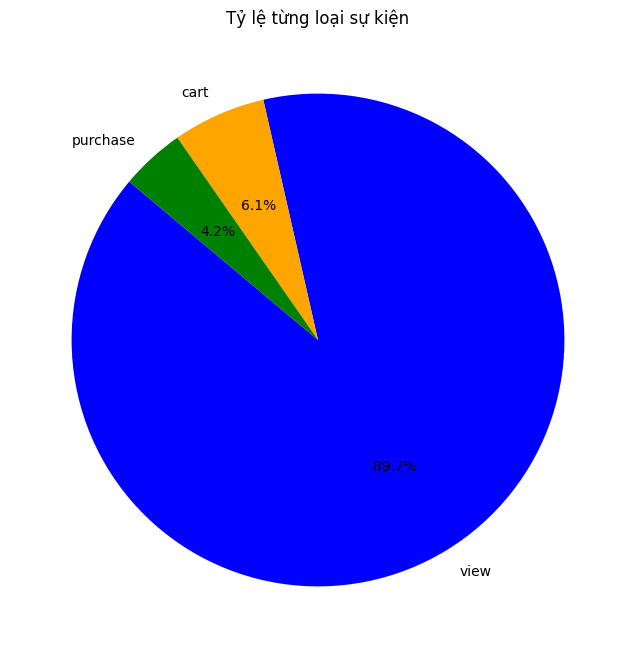

In [ ]:
# Đếm số lượng từng loại sự kiện
event_counts = data['event_type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title('Tỷ lệ từng loại sự kiện')
plt.show()

### Nhận xét biểu đồ

Biểu đồ tròn trên minh họa tỷ lệ phần trăm của từng loại sự kiện trong dataset:
- **`view`** chiếm tỷ lệ lớn nhất (89.7%), cho thấy phần lớn các sự kiện là người dùng xem sản phẩm.
- **`cart`** chiếm 6.1%, thể hiện số lượng sự kiện người dùng thêm sản phẩm vào giỏ hàng.
- **`purchase`** chiếm 4.2%, cho thấy số lượng sự kiện mua hàng là nhỏ nhất.

Nhận xét:
- Tỷ lệ sự kiện `view` áp đảo, điều này có thể phản ánh hành vi phổ biến của người dùng là chỉ xem sản phẩm mà không thực hiện hành động tiếp theo.
- Tỷ lệ `cart` và `purchase` thấp hơn nhiều, điều này có thể gợi ý cần cải thiện trải nghiệm mua sắm để tăng tỷ lệ chuyển đổi từ xem sản phẩm sang mua hàng.

### Số lượng các sự kiện theo ngày/tháng có biến động thế nào?

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_14008\3519762086.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['event_month'] = data['event_time'].dt.to_period('M')  # Lấy tháng


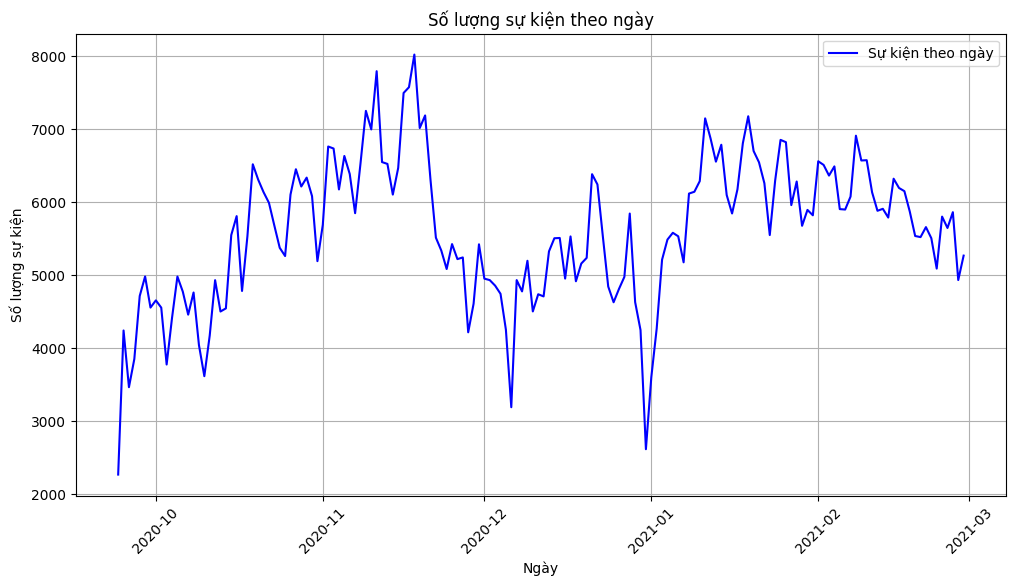

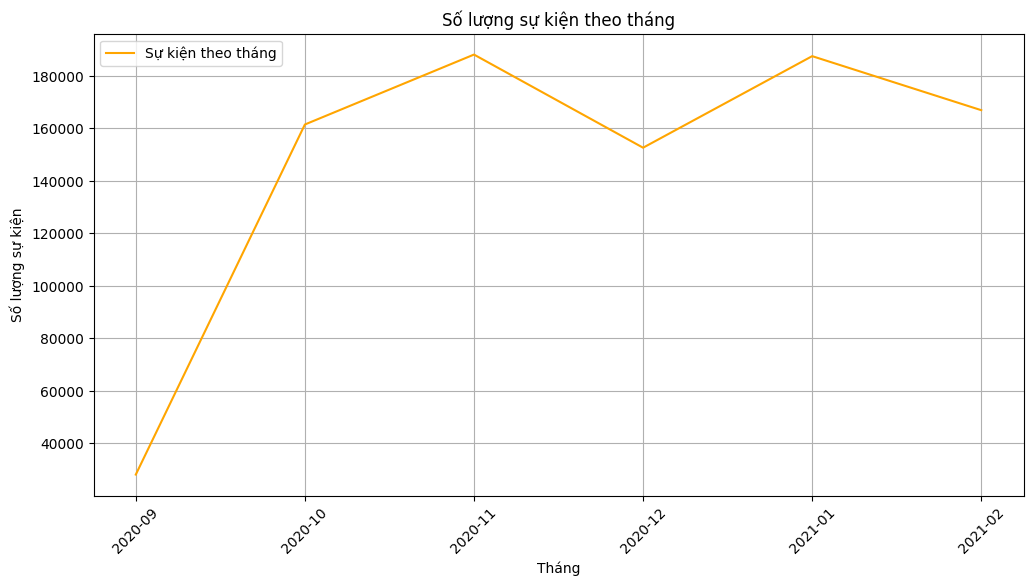

In [ ]:
# Tạo cột ngày và tháng từ cột 'event_time'
data['event_date'] = data['event_time'].dt.date  # Lấy ngày
data['event_month'] = data['event_time'].dt.to_period('M')  # Lấy tháng

# Đếm số lượng sự kiện theo ngày
events_per_day = data.groupby('event_date').size()

# Đếm số lượng sự kiện theo tháng
events_per_month = data.groupby('event_month').size()

# Vẽ biểu đồ đường cho số lượng sự kiện theo ngày
plt.figure(figsize=(12, 6))
plt.plot(events_per_day.index, events_per_day.values, label='Sự kiện theo ngày', color='blue')
plt.title('Số lượng sự kiện theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng sự kiện')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ đường cho số lượng sự kiện theo tháng
plt.figure(figsize=(12, 6))
plt.plot(events_per_month.index.astype(str), events_per_month.values, label='Sự kiện theo tháng', color='orange')
plt.title('Số lượng sự kiện theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng sự kiện')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Nhận xét biểu đồ

#### Biểu đồ 1: Số lượng sự kiện theo ngày
- Biểu đồ đường cho thấy sự biến động hàng ngày của số lượng sự kiện.
- Có sự tăng trưởng rõ rệt từ đầu tháng 10/2020 đến giữa tháng 11/2020.
- Sau đó, số lượng sự kiện dao động với các đỉnh và đáy rõ ràng, đặc biệt giảm mạnh vào cuối tháng 12/2020 (có thể do kỳ nghỉ lễ).
- Từ tháng 1/2021 đến tháng 2/2021, số lượng sự kiện có xu hướng giảm dần.

#### Biểu đồ 2: Số lượng sự kiện theo tháng
- Số lượng sự kiện tăng mạnh từ tháng 10/2020 và đạt đỉnh vào tháng 11/2020.
- Tháng 12/2020 có sự giảm nhẹ, nhưng tăng trở lại vào tháng 1/2021.
- Tháng 2/2021 ghi nhận sự giảm sút so với các tháng trước.

### Tổng kết
- Số lượng sự kiện có xu hướng tăng mạnh vào các tháng cuối năm (tháng 10 và 11), có thể do các chương trình khuyến mãi hoặc mùa mua sắm cuối năm.
- Sự giảm sút vào tháng 12/2020 và tháng 2/2021 có thể liên quan đến các yếu tố như kỳ nghỉ lễ hoặc giảm nhu cầu mua sắm.

### Mỗi người dùng trung bình tương tác bao nhiêu lần?

### Mỗi người dùng trung bình tương tác bao nhiêu lần?

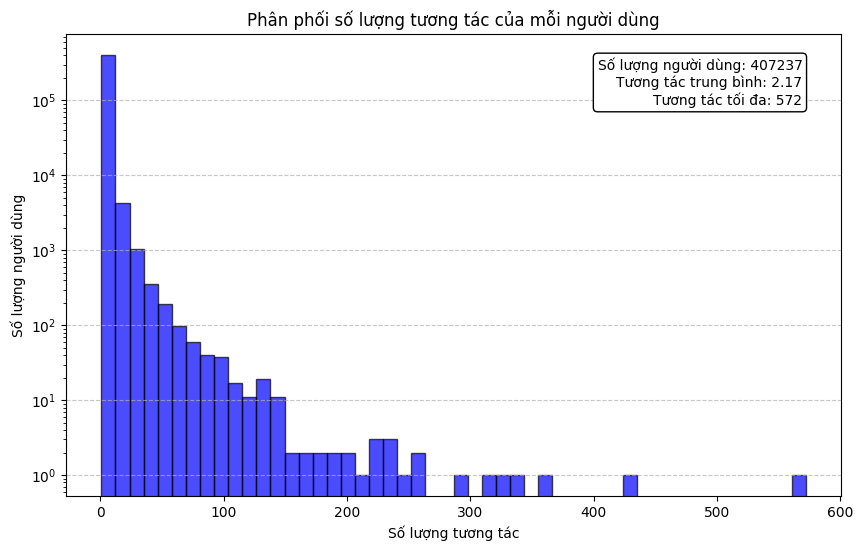

In [ ]:

# Gom nhóm từng user và đếm tổng số tương tác của mỗi người
user_interactions = data.groupby('user_id').size()

# Tính toán thông tin cơ bản
num_users = len(user_interactions)
avg_interactions = user_interactions.mean()
max_interactions = user_interactions.max()


# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Phân phối số lượng tương tác của mỗi người dùng')
plt.xlabel('Số lượng tương tác')
plt.ylabel('Số lượng người dùng')
plt.yscale('log')  # Sử dụng log scale để dễ quan sát hơn nếu dữ liệu phân phối không đều
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm chú thích vào biểu đồ
plt.text(0.95, 0.95, 
         f"Số lượng người dùng: {num_users}\n"
         f"Tương tác trung bình: {avg_interactions:.2f}\n"
         f"Tương tác tối đa: {max_interactions}", 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top', 
         horizontalalignment='right', 
         bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Hiển thị biểu đồ
plt.show()

### Nhận xét biểu đồ

Biểu đồ trên minh họa **phân phối số lượng tương tác của mỗi người dùng** với các nhận xét sau:

1. **Phân phối lệch phải**:
   - Phần lớn người dùng có số lượng tương tác rất thấp, tập trung ở khoảng 0-10 tương tác.
   - Số lượng người dùng giảm dần khi số lượng tương tác tăng lên.

2. **Số liệu thống kê**:
   - Tổng số người dùng: **407,237**.
   - Số lượng tương tác trung bình: **2.17**.
   - Số lượng tương tác tối đa: **572**.

3. **Ý nghĩa**:
   - Phần lớn người dùng chỉ tương tác một vài lần, điều này có thể phản ánh hành vi phổ biến là người dùng chỉ xem sản phẩm mà không thực hiện nhiều hành động khác.
   - Một số ít người dùng có số lượng tương tác rất cao, có thể là khách hàng trung thành hoặc người dùng có hành vi mua sắm tích cực.

4. **Hướng cải thiện**:
   - Cần tập trung vào việc tăng số lượng tương tác của nhóm người dùng có tương tác thấp, ví dụ bằng cách cải thiện trải nghiệm người dùng hoặc triển khai các chương trình khuyến mãi.

### Có bao nhiêu người dùng chỉ xem mà không mua?

In [ ]:
# Lọc người dùng chỉ có sự kiện 'view' và không có 'purchase'
users_only_view = data.groupby('user_id')['event_type'].apply(lambda x: set(x) == {'view'})

# Đếm số lượng người dùng chỉ xem
num_users_only_view = users_only_view.sum()

print(f"Số lượng người dùng chỉ xem mà không mua: {num_users_only_view}")

Số lượng người dùng chỉ xem mà không mua: 369040


### Top 10 danh mục được mua từ lần đầu

Danh mục được mua từ lần đầu:
category
computers       225
unknown         132
electronics     101
stationery       42
auto             15
appliances       13
construction     11
furniture         4
accessories       1
Name: count, dtype: int64
Số lượng danh mục được mua từ lần đầu: 9


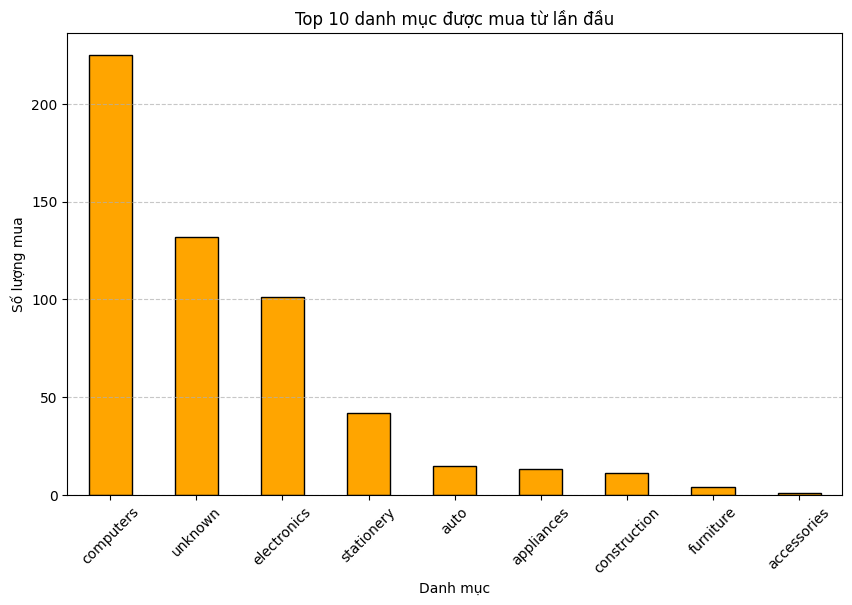

In [ ]:
# Lọc người dùng mua hàng từ lần đầu tiên xem
first_event = data.groupby('user_id').first()  # Lấy sự kiện đầu tiên của mỗi người dùng
categories_purchased_first_view = first_event[first_event['event_type'] == 'purchase']

# Lấy danh sách các danh mục được mua từ lần đầu
purchased_categories = categories_purchased_first_view['category'].value_counts()

# In kết quả
print("Danh mục được mua từ lần đầu:")
print(purchased_categories)


num_categories = purchased_categories.count()
print(f"Số lượng danh mục được mua từ lần đầu: {num_categories}")

# Trực quan hóa top 10 danh mục được mua từ lần đầu
top_10_categories = purchased_categories.head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 danh mục được mua từ lần đầu')
plt.xlabel('Danh mục')
plt.ylabel('Số lượng mua')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nhận xét biểu đồ

Biểu đồ trên minh họa **Top 10 danh mục được mua từ lần đầu** với các nhận xét sau:

1. **Danh mục nổi bật**:
   - **`computers`** là danh mục được mua nhiều nhất từ lần đầu, với hơn 200 lượt mua.
   - **`unknown`** và **`electronics`** lần lượt đứng thứ hai và thứ ba, với số lượng mua đáng kể.

2. **Danh mục ít phổ biến hơn**:
   - Các danh mục như **`stationery`**, **`auto`**, **`appliances`**, và **`construction`** có số lượng mua thấp hơn nhiều.
   - **`furniture`** và **`accessories`** có số lượng mua rất ít, gần như không đáng kể.

3. **Ý nghĩa**:
   - Danh mục **`computers`** và **`electronics`** chiếm ưu thế, cho thấy người dùng có xu hướng mua các sản phẩm công nghệ cao ngay từ lần đầu.
   - Sự xuất hiện của **`unknown`** cho thấy có một số dữ liệu chưa được phân loại rõ ràng, cần được kiểm tra và xử lý.

4. **Hướng cải thiện**:
   - Tăng cường quảng bá các danh mục ít phổ biến hơn như **`stationery`**, **`furniture`**, và **`accessories`** để thu hút sự chú ý của người dùng.
   - Xử lý và phân loại lại các sản phẩm thuộc danh mục **`unknown`** để có cái nhìn rõ ràng hơn về hành vi mua sắm.

### Sản phẩm nào được xem nhiều nhất?

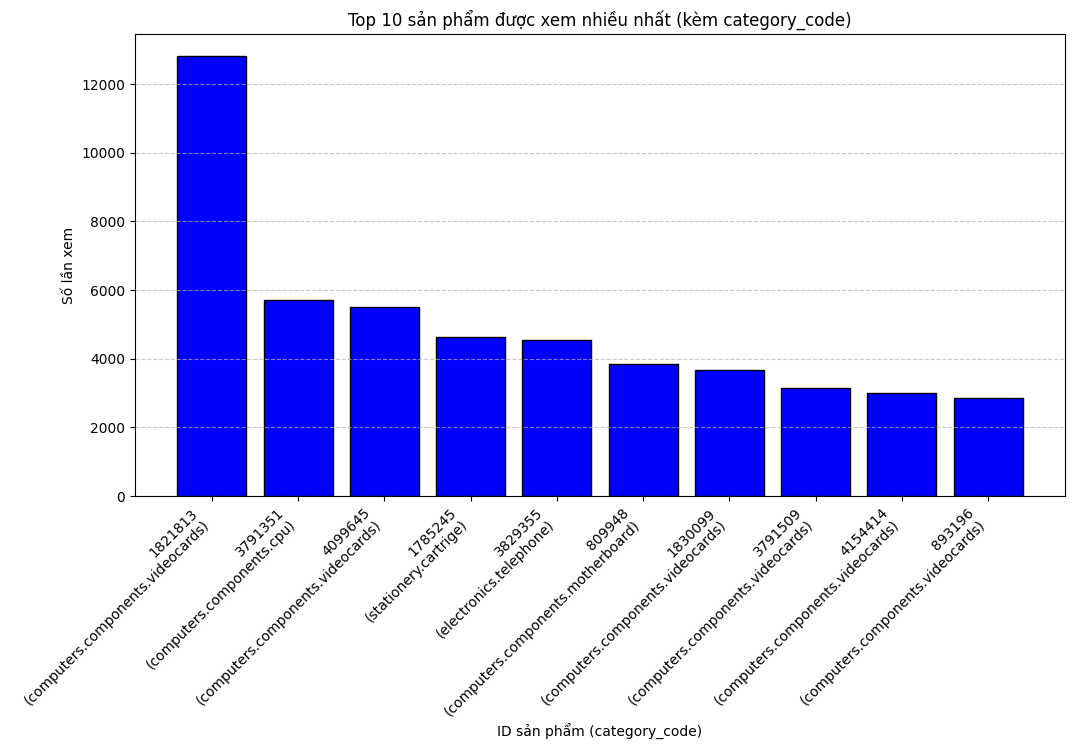

In [ ]:
# Đếm số lần mỗi sản phẩm được xem
most_viewed_products = data[data['event_type'] == 'view']['product_id'].value_counts()

# Lấy top 10 sản phẩm được xem nhiều nhất
top_10_viewed = most_viewed_products.head(10)

# Lấy category_code tương ứng cho các sản phẩm được xem nhiều nhất
viewed_categories = data[data['product_id'].isin(top_10_viewed.index)][['product_id', 'category_code']].drop_duplicates()

# Tạo từ điển {product_id: category_code} cho các sản phẩm được xem nhiều nhất
viewed_dict = dict(zip(viewed_categories['product_id'], viewed_categories['category_code']))

# Trực quan hóa sản phẩm được xem nhiều nhất
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_10_viewed_labels = [f"{pid}\n({viewed_dict.get(pid, 'unknown')})" for pid in top_10_viewed.index]
plt.bar(top_10_viewed_labels, top_10_viewed.values, color='blue', edgecolor='black')
plt.title('Top 10 sản phẩm được xem nhiều nhất (kèm category_code)')
plt.xlabel('ID sản phẩm (category_code)')
plt.ylabel('Số lần xem')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Nhận xét: 
1. **Sản phẩm nổi bật**:
   - Sản phẩm có ID `182213` thuộc danh mục **`computers.components.video`** được xem nhiều nhất, với hơn 12,000 lượt xem.
   - Các sản phẩm còn lại có lượt xem dao động từ 2,000 đến 6,000, chủ yếu thuộc danh mục **`computers.components`** và **`electronics.telephony`**.

2. **Ý nghĩa**:
   - Sản phẩm thuộc danh mục **`computers.components`** chiếm ưu thế, cho thấy người dùng có xu hướng tìm kiếm và xem các sản phẩm liên quan đến linh kiện máy tính.
   - Sản phẩm thuộc danh mục **`electronics.telephony`** cũng có lượt xem đáng kể, phản ánh sự quan tâm đến các thiết bị điện tử.

3. **Hướng cải thiện**:
   - Tăng cường quảng bá các sản phẩm ít được xem hơn để thu hút sự chú ý của người dùng.
   - Phân tích thêm lý do tại sao sản phẩm `182213` có lượt xem vượt trội để áp dụng chiến lược tương tự cho các sản phẩm khác.

---

### Sản phẩm nào được mua nhiều nhất?

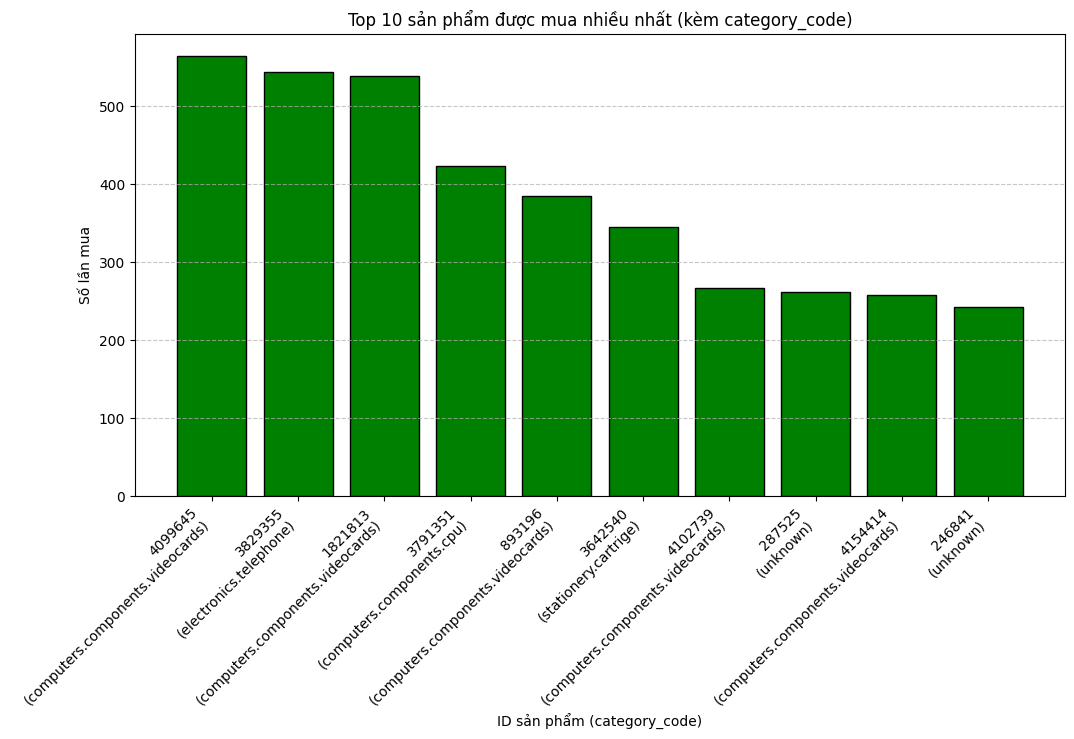

In [ ]:
# Đếm số lần mỗi sản phẩm được mua
most_purchased_products = data[data['event_type'] == 'purchase']['product_id'].value_counts()

# Lấy top 10 sản phẩm được mua nhiều nhất
top_10_purchased = most_purchased_products.head(10)

# Lấy category_code tương ứng cho các sản phẩm được mua nhiều nhất
purchased_categories = data[data['product_id'].isin(top_10_purchased.index)][['product_id', 'category_code']].drop_duplicates()

# Tạo từ điển {product_id: category_code} cho các sản phẩm được mua nhiều nhất
purchased_dict = dict(zip(purchased_categories['product_id'], purchased_categories['category_code']))

# Trực quan hóa sản phẩm được mua nhiều nhất
plt.figure(figsize=(12, 6))
top_10_purchased_labels = [f"{pid}\n({purchased_dict.get(pid, 'unknown')})" for pid in top_10_purchased.index]
plt.bar(top_10_purchased_labels, top_10_purchased.values, color='green', edgecolor='black')
plt.title('Top 10 sản phẩm được mua nhiều nhất (kèm category_code)')
plt.xlabel('ID sản phẩm (category_code)')
plt.ylabel('Số lần mua')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Nhận xét:
1. **Sản phẩm nổi bật**:
   - Sản phẩm có ID `403665` và `390215` thuộc danh mục **`computers.components.video`** được mua nhiều nhất, với hơn 500 lượt mua.
   - Các sản phẩm còn lại có lượt mua dao động từ 200 đến 500, chủ yếu thuộc danh mục **`computers.components`**, **`electronics.telephony`**, và một số sản phẩm không rõ danh mục (**`unknown`**).

2. **Ý nghĩa**:
   - Sản phẩm thuộc danh mục **`computers.components`** tiếp tục chiếm ưu thế, cho thấy người dùng không chỉ xem mà còn mua nhiều sản phẩm trong danh mục này.
   - Sự xuất hiện của sản phẩm thuộc danh mục **`unknown`** cho thấy cần kiểm tra và phân loại lại dữ liệu để hiểu rõ hơn về hành vi mua sắm.

3. **Hướng cải thiện**:
   - Tăng cường quảng bá các sản phẩm có lượt mua thấp hơn để cải thiện doanh số.
   - Xử lý và phân loại lại các sản phẩm thuộc danh mục **`unknown`** để có cái nhìn rõ ràng hơn về hành vi mua sắm.

## Phân tích conversion rate (tỷ lệ chuyển đổi)

### Tỉ lệ chuyển đổi tổng thể từ view sang purchase

In [ ]:
data['hour'] = data['event_time'].dt.hour

def calc_conversion_rate(group):
    views = group[group['event_type'] == 'view']
    purchases = group[group['event_type'] == 'purchase']
    return (len(purchases) / len(views) * 100) if len(views) > 0 else 0

In [ ]:
conversion_rate_overall = calc_conversion_rate(data)
print(f"Tỷ lệ chuyển đổi tổng thể: {conversion_rate_overall:.2f} %")

Tỷ lệ chuyển đổi tổng thể: 4.71 %


Tỷ lệ chuyển đổi tổng thể `4.71%` là `khá tốt`. Với ngành `thương mại điện tử`, conversion rate trung bình thường rơi vào khoảng `2%–3%`. Con số 4.71% thể hiện hiệu quả tương đối cao trong việc chuyển đổi từ người xem thành người mua hàng.

Đây là dấu hiệu tích cực cho thấy `hiệu quả` của UX/UI, quảng cáo hoặc chất lượng sản phẩm.

### Conversion rate thay đổi như thế nào theo tháng/tuần/ngày?

In [ ]:
conversion_by_month = data.groupby('month').apply(calc_conversion_rate)
conversion_by_week = data.groupby('week').apply(calc_conversion_rate)
conversion_by_day = data.groupby('day').apply(calc_conversion_rate)
conversion_by_hour = data.groupby('hour').apply(calc_conversion_rate)

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_14008\3274651791.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_by_month = data.groupby('month').apply(calc_conversion_rate)
C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_14008\3274651791.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_by_week = data.groupby('week').apply(calc_conversion_rate)
C:\Users\EliteBook

#### Conversion rate thay đổi theo tháng

In [ ]:
custom_month_order = [9, 10, 11, 12, 1, 2]
conversion_by_month = conversion_by_month.loc[custom_month_order]

print("\nTỷ lệ chuyển đổi theo tháng:")
print(conversion_by_month.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))


Tỷ lệ chuyển đổi theo tháng:
 month  Conversion Rate (%)
     9                 3.93
    10                 4.28
    11                 4.45
    12                 4.77
     1                 4.99
     2                 5.17


In [ ]:
import plotly.graph_objects as go

months = conversion_by_month.index.astype(str)
rates = conversion_by_month.round(2).values / 100 

fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=rates,
    name='Tỷ lệ chuyển đổi',
    marker_color='#0e4f66',
    width=0.4,
))

fig.add_trace(go.Scatter(
    x=months,
    y=rates,
    mode='lines+markers',
    name='Đường xu hướng',
    line=dict(color="gray", width=2.5),
    marker=dict(color="gray", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo tháng từ View sang Purchase',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"),
    yaxis_tickformat=".2%",
    xaxis_title="Tháng",
    yaxis_title="Tỷ lệ chuyển đổi (%)",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
)

fig.show()


Ta thấy xu hướng `tăng trưởng dần` theo thời gian từ tháng 9 → tháng 2, cho thấy xu hướng:

- Người dùng có xu hướng `mua sắm nhiều hơn` vào `cuối năm` và `đầu năm` (dịp lễ, Tết).

- Tháng 9 có tỷ lệ thấp nhất → cần cải thiện khuyến mãi, chiến dịch marketing, tối ưu UI/UX.

#### Conversion rate thay đổi theo tuần

In [ ]:
custom_week_order = [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8]
conversion_by_week = conversion_by_week.loc[custom_week_order]

print("\nTỷ lệ chuyển đổi theo tuần:")
print(conversion_by_week.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))


Tỷ lệ chuyển đổi theo tuần:
 week  Conversion Rate (%)
   39                 3.65
   40                 4.18
   41                 4.59
   42                 4.25
   43                 4.29
   44                 4.13
   45                 4.29
   46                 4.89
   47                 4.16
   48                 4.41
   49                 4.30
   50                 4.67
   51                 5.13
   52                 4.87
   53                 4.73
    1                 4.57
    2                 5.02
    3                 5.42
    4                 5.10
    5                 4.75
    6                 5.29
    7                 5.55
    8                 5.10


In [ ]:
weeks = conversion_by_week.index.astype(str)
rates = conversion_by_week.round(2).values / 100

fig = go.Figure()

fig.add_trace(go.Bar(
    x=weeks,
    y=rates,
    name='Tỷ lệ chuyển đổi',
    marker_color='#0e4f66',
    width=0.4,
))

fig.add_trace(go.Scatter(
    x=weeks,
    y=rates,
    mode='lines+markers',
    name='Đường xu hướng',
    line=dict(color="gray", width=2.5),
    marker=dict(color="gray", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo tuần từ View sang Purchase',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"), 
    yaxis_tickformat=".2%", 
    xaxis_title="Tuần",
    yaxis_title="Tỷ lệ chuyển đổi",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    xaxis_tickvals=weeks,  
)

fig.show()

- Tỷ lệ chuyển đổi theo tuần dao động ổn định quanh mức 4% – 5.5%
→ Cho thấy hiệu quả giữ vững, không có biến động lớn bất thường.

- Xu hướng chung có chiều hướng `tăng nhẹ`
→ Đặc biệt từ `tuần 1` đến `tuần 7`, tỷ lệ chuyển đổi có sự cải thiện rõ rệt, đạt đỉnh khoảng `5.5%` ở `tuần 7`.

- Giai đoạn `thấp nhất` rơi vào `tuần 39` (dưới 4%)
→ Cần xem xét nguyên nhân: có thể do ít chiến dịch, thời điểm ít mua sắm, hoặc thay đổi thuật toán phân phối.

#### Conversion rate thay đổi theo ngày

In [ ]:
print("\nTỷ lệ chuyển đổi theo ngày:")
print(conversion_by_day.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))


Tỷ lệ chuyển đổi theo ngày:
 day  Conversion Rate (%)
   1                 4.48
   2                 4.32
   3                 4.15
   4                 4.31
   5                 4.40
   6                 4.52
   7                 4.76
   8                 4.96
   9                 4.77
  10                 4.54
  11                 5.04
  12                 5.09
  13                 4.90
  14                 4.99
  15                 4.39
  16                 4.77
  17                 4.87
  18                 5.14
  19                 4.75
  20                 4.99
  21                 4.99
  22                 4.60
  23                 5.05
  24                 5.06
  25                 4.60
  26                 4.53
  27                 4.63
  28                 4.68
  29                 4.31
  30                 4.47
  31                 4.53


In [ ]:
days = conversion_by_day.index.astype(str)
rates = conversion_by_day.round(2).values / 100

fig = go.Figure()

fig.add_trace(go.Bar(
    x=days,
    y=rates,
    name='Tỷ lệ chuyển đổi',
    marker_color='#0e4f66',
    width=0.4,
))

fig.add_trace(go.Scatter(
    x=days,
    y=rates,
    mode='lines+markers',
    name='Đường xu hướng',
    line=dict(color="gray", width=2.5),
    marker=dict(color="gray", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo ngày từ View sang Purchase',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"),  
    yaxis_tickformat=".2%",
    xaxis_title="Ngày",
    yaxis_title="Tỷ lệ chuyển đổi",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    xaxis_tickvals=days,  
)

fig.show()

- Tỷ lệ chuyển đổi hàng ngày dao động quanh mức `4.2% – 5.1%`
→ Mức chuyển đổi `khá ổn định`, không có ngày nào giảm mạnh đột ngột.

- `Ngày 8` và `ngày 18` có tỷ lệ `cao nhất` (~4.96 – 5.14%)
→ Có thể trùng với dịp khuyến mãi, quảng cáo mạnh hoặc chiến dịch hiệu quả.

- Một vài ngày có dấu hiệu `giảm nhẹ` như ngày `3, 15, 23 và 29` (~4.2%)
→ Nên kiểm tra lại chiến lược nội dung hoặc quảng cáo trong các ngày này.

#### Conversion rate thay đổi theo giờ trong ngày

In [ ]:
print("\nTỷ lệ chuyển đổi theo giờ trong ngày:")
print(conversion_by_hour.round(2).reset_index(name='Conversion Rate (%)').to_string(index=False))


Tỷ lệ chuyển đổi theo giờ trong ngày:
 hour  Conversion Rate (%)
    0                 3.86
    1                 3.61
    2                 3.97
    3                 4.17
    4                 4.14
    5                 4.35
    6                 4.77
    7                 4.76
    8                 4.96
    9                 5.29
   10                 5.38
   11                 5.24
   12                 4.86
   13                 4.77
   14                 4.89
   15                 4.46
   16                 4.48
   17                 4.48
   18                 4.27
   19                 4.73
   20                 4.61
   21                 4.45
   22                 4.54
   23                 4.32


In [ ]:
hours = conversion_by_hour.index.astype(str)
rates = conversion_by_hour.round(2).values / 100

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hours,
    y=rates,
    mode='lines+markers',
    name='Tỷ lệ chuyển đổi',
    line=dict(color="#0e4f66", width=2.5),
    marker=dict(color="#0e4f66", size=8),
))

fig.update_layout(
    title='Tỷ lệ chuyển đổi theo giờ trong ngày',
    title_font=dict(size=20, family="serif", color="#323232", weight="bold"),  
    yaxis_tickformat=".2%",  
    xaxis_title="Giờ trong ngày",
    yaxis_title="Tỷ lệ chuyển đổi",
    plot_bgcolor="#fbfbfb",
    font=dict(family="Arial, sans-serif"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    xaxis_tickvals=hours,  
)

fig.show()

- Tỷ lệ chuyển đổi `thấp nhất` xảy ra vào khoảng `1 giờ sáng` (~3.61%).

- Tỷ lệ chuyển đổi `cao nhất` rơi vào khoảng `10 giờ sáng` (~5.38%).

- `Sau 10h sáng`, tỷ lệ bắt đầu `giảm dần`, dao động nhẹ vào buổi chiều và tối.

- Từ `16h đến 23h`, tỷ lệ `ổn định` quanh mức ~4.4–4.7%, không có biến động mạnh.

Ta có thể rút ra rằng sáng từ `6h–11h` là `thời điểm "vàng"` để tối ưu chuyển đổi, từ đó xây dựng chiến lược nắm bắt thời cơ vào thời gian này

### Những sản phẩm nào có Conversion Rate cao nhất và thấp nhất?

In [ ]:
product_views = data[data['event_type'] == 'view'].groupby('product_id').size()
product_purchases = data[data['event_type'] == 'purchase'].groupby('product_id').size()
product_conversion_rate = (product_purchases / product_views * 100).dropna()

top_products = product_conversion_rate.sort_values(ascending=False).head(5)
bottom_products = product_conversion_rate.sort_values(ascending=True).head(5)

print("\nTop sản phẩm conversion rate cao nhất:\n", top_products.round(2))
print("\nSản phẩm conversion rate thấp nhất:\n", bottom_products.round(2))


Top sản phẩm conversion rate cao nhất:
 product_id
1549480    500.0
1263515    500.0
3830465    400.0
1682318    400.0
599754     400.0
dtype: float64

Sản phẩm conversion rate thấp nhất:
 product_id
4163312    0.22
337150     0.30
4170994    0.33
788109     0.38
139017     0.42
dtype: float64


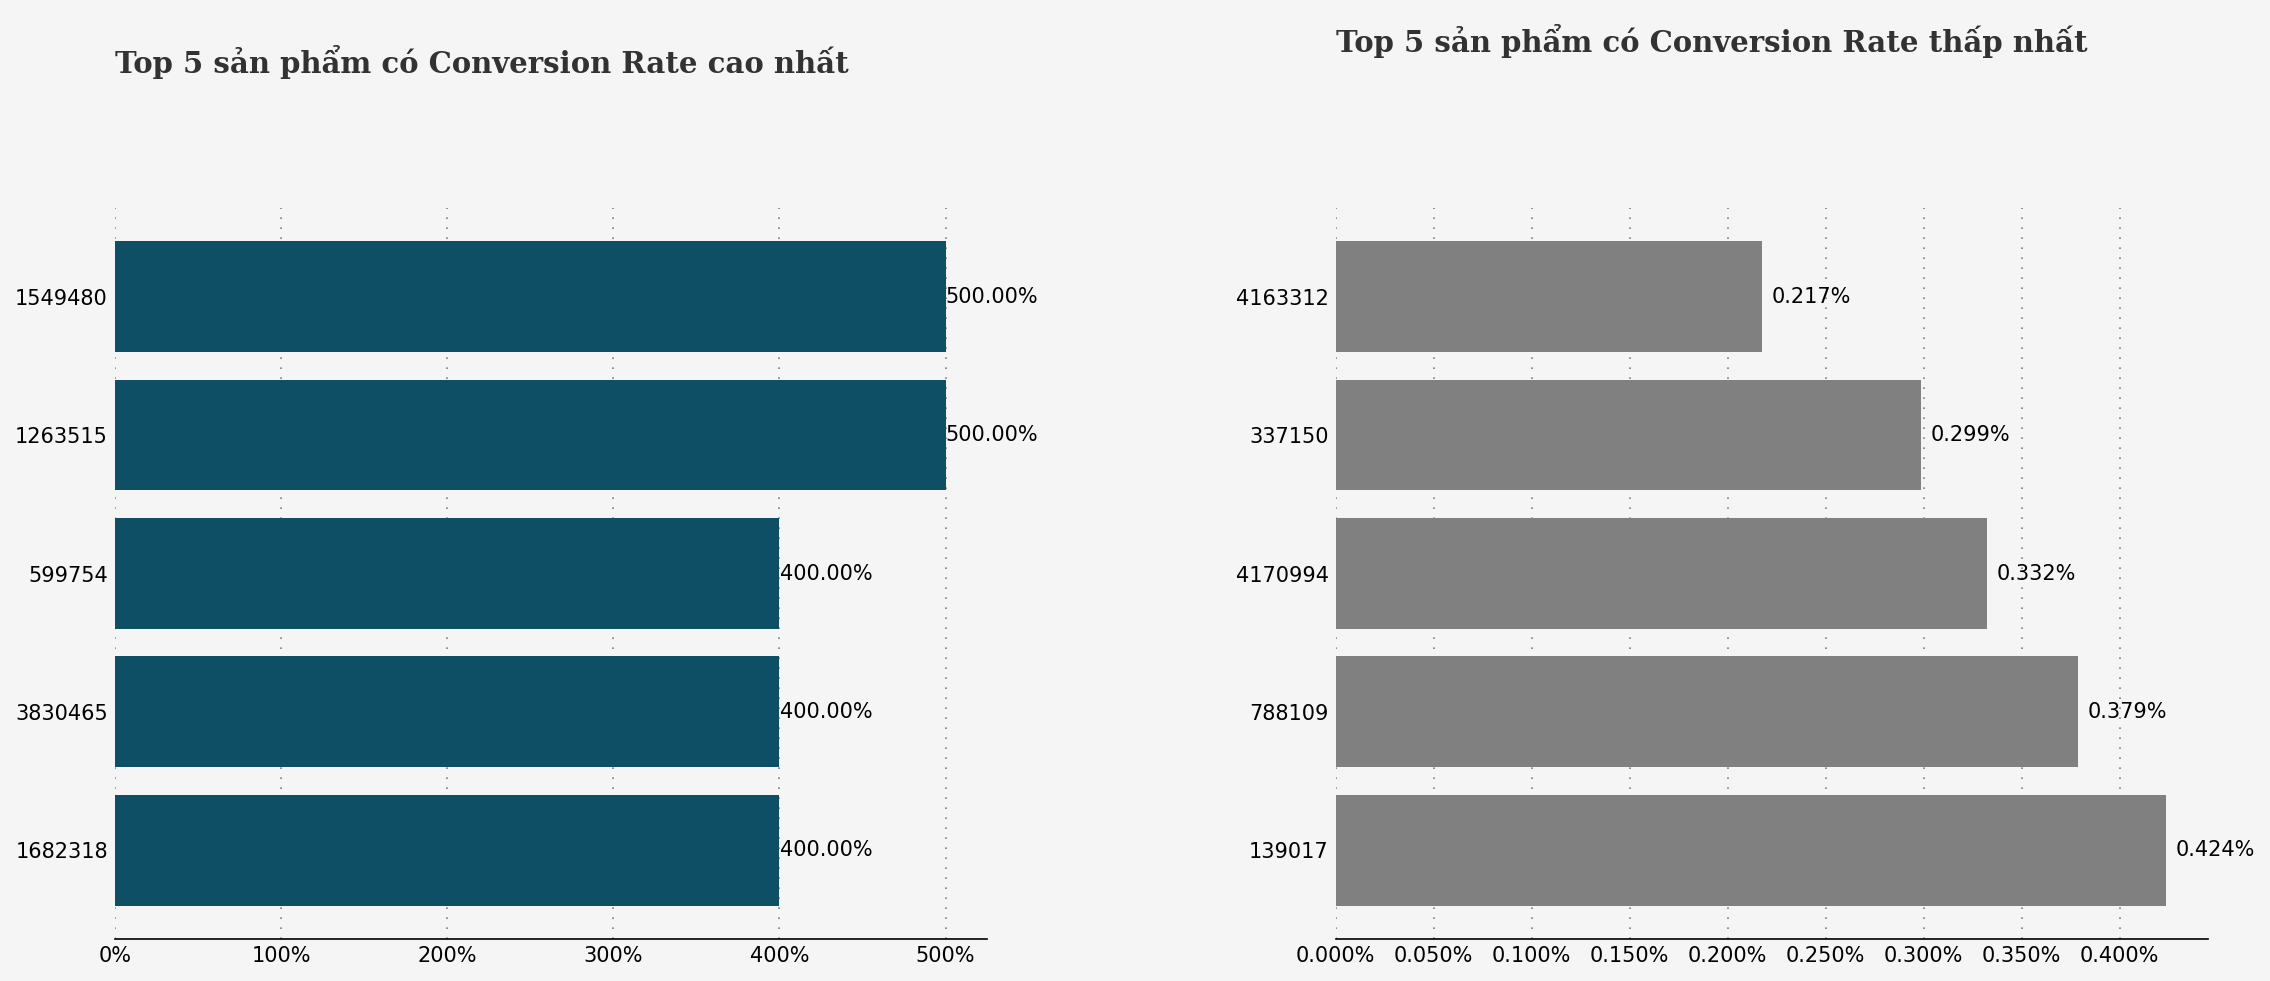

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

background_color = "#f5f5f5"
fig = plt.figure(figsize=(18, 8), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 2, height_ratios=[0.1, 1])
gs.update(hspace=0.3, wspace=0.4)

title_ax0 = fig.add_subplot(gs[0, 0])
title_ax1 = fig.add_subplot(gs[0, 1])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])

for title_ax in [title_ax0, title_ax1]:
    title_ax.axis('off')

title_ax0.text(0, 0.2, "Top 5 sản phẩm có Conversion Rate cao nhất", 
               fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
title_ax1.text(0, 0.5, "Top 5 sản phẩm có Conversion Rate thấp nhất", 
               fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

top_products_sorted = top_products.sort_values(ascending=True)  
bottom_products_sorted = bottom_products.sort_values(ascending=False) 


ax0.barh(top_products_sorted.index.astype(str), top_products_sorted.values, color="#0e4f66", zorder=3)
ax1.barh(bottom_products_sorted.index.astype(str), bottom_products_sorted.values, color="gray", zorder=3)

for i, v in enumerate(top_products_sorted.values):
    ax0.text(v + 0.2, i, f"{v:.2f}%", va='center', fontsize=10)

for i, v in enumerate(bottom_products_sorted.values):
    ax1.text(v + 0.005, i, f"{v:.3f}%", va='center', fontsize=10)

for ax in [ax0, ax1]:
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_facecolor(background_color)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.show()


### Top 10 thương hiệu có Conversion Rate cao nhất

In [ ]:
conversion_by_brand = data.groupby('brand').apply(calc_conversion_rate)
print(conversion_by_brand.sort_values(ascending=False).round(2).head(10))

brand
noreve        350.00
polaroid      100.00
accesstyle    100.00
yeastar        64.29
marvo          33.33
printpro       25.49
mobparts       23.08
klevv          20.00
atrix          20.00
codyson        19.35
dtype: float64


C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_14008\567733100.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



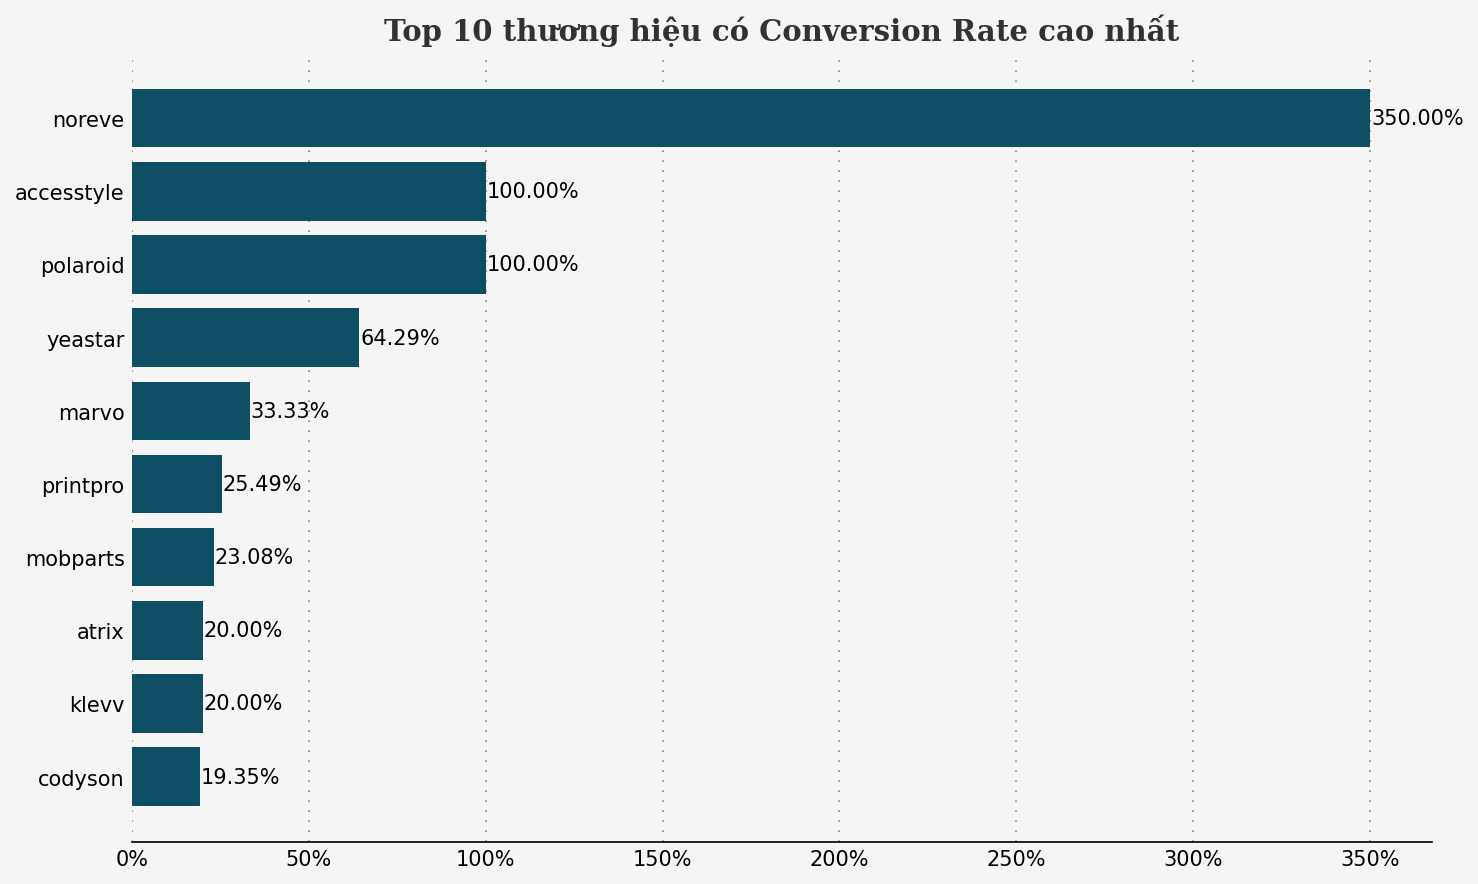

In [ ]:
top_brands = conversion_by_brand.sort_values(ascending=False).head(10)
top_brands = top_brands.sort_values(ascending=True)  

fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
fig.patch.set_facecolor("#f5f5f5")
ax.set_facecolor("#f5f5f5")

ax.barh(top_brands.index, top_brands.values, color="#0e4f66", zorder=3)

for i, v in enumerate(top_brands.values):
    ax.text(v + 0.2, i, f"{v:.2f}%", va='center', fontsize=10)

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
ax.tick_params(axis='both', length=0)
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Top 10 thương hiệu có Conversion Rate cao nhất", 
             fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

plt.tight_layout()
plt.show()


- `Noreve` vượt trội hoàn toàn với 350%, cao gấp 3,5 lần so với số lượng truy cập — đây có thể do số lượt click rất ít nhưng `đơn hàng cao`.

- `Accesstyle` và `Polaroid` đều có Conversion Rate `100%`, nghĩa là mỗi lượt truy cập đều chuyển đổi thành đơn hàng rất cao.

- `Yeastar` cũng khá ấn tượng với `64.29%`, trong khi các thương hiệu còn lại dao động từ ~19% đến ~33%.

Điều này cho thấy một số thương hiệu rất `hiệu quả` trong việc tăng chuyển đổi, có thể nhờ vào: 

- `Tệp khách hàng phù hợ`p, có thể mua ngay nhờ danh tiếng và đã biết đến trước đó

- Sản phẩm `độc quyền` hoặc hấp dẫn

- Hoặc lượng truy cập nhỏ nhưng rất sản phẩm `chất lượng`.

### Phễu chuyển đổi View → Cart → Purchase

In [ ]:
funnel = data.pivot_table(
    index='user_session',
    columns='event_type',
    values='product_id',
    aggfunc='count'
).fillna(0)

# Tổng số view, cart, purchase
total_view = (funnel['view'] > 0).sum()
total_cart = (funnel['cart'] > 0).sum() if 'cart' in funnel.columns else 0
total_purchase = (funnel['purchase'] > 0).sum() if 'purchase' in funnel.columns else 0

# Tính tỷ lệ
cart_rate = total_cart / total_view * 100 if total_view > 0 else 0
purchase_rate = total_purchase / total_cart * 100 if total_cart > 0 else 0

print(f"Tổng sessions có view: {total_view}")
print(f"Tổng sessions có cart: {total_cart} → {cart_rate:.2f}% từ view")
print(f"Tổng sessions có purchase: {total_purchase} → {purchase_rate:.2f}% từ cart")


Tổng sessions có view: 488360
Tổng sessions có cart: 41270 → 8.45% từ view
Tổng sessions có purchase: 24344 → 58.99% từ cart


In [ ]:
import plotly.express as px

funnel_data = {
    'Stage': ['View', 'Cart', 'Purchase'],
    'Sessions': [total_view, total_cart, total_purchase],
    'Conversion Rate': [100, cart_rate, purchase_rate]
}

import pandas as pd
funnel_df = pd.DataFrame(funnel_data)

fig = px.funnel(funnel_df, x='Sessions', y='Stage', 
                title='Funnel Analysis: View → Cart → Purchase',
                labels={'Sessions': 'Total Sessions', 'Stage': 'Event Stage'})

max_x = max(funnel_df['Sessions'])

for i, row in funnel_df.iterrows():
    fig.add_annotation(
        x=row['Sessions'] + max_x * 0.06, 
        y=row['Stage'],
        text=f'{row["Conversion Rate"]:.2f}%', 
        showarrow=False,
        font=dict(size=12, color='black')
    )

fig.update_layout(
    title="Funnel Analysis: View → Cart → Purchase",
    title_x=0.5,
    font=dict(size=12, family='Arial'),
    width=1300,   
    height=600    
)

fig.show()



Tỷ lệ chuyển đổi từ View → Cart `rất thấp` (8.45%)
→ Có tới hơn `91%` người xem sản phẩm nhưng `không thêm vào giỏ hàng`, điều này gợi ý:
- Nội dung sản phẩm, hình ảnh hoặc mô tả chưa đủ hấp dẫn.
- Giá hoặc thông tin sản phẩm chưa phù hợp.
- Trải nghiệm người dùng (UX) khi thêm vào giỏ còn rườm rà.

Tỷ lệ chuyển đổi từ Cart → Purchase lại `khá cao` (58.99%)
→ Một khi người dùng đã thêm vào giỏ, khả năng họ mua rất lớn, cho thấy:
- Quy trình thanh toán đang hoạt động hiệu quả.
- Người dùng thực sự có ý định mua khi đã vào bước giỏ hàng.

Điểm nghẽn chính nằm ở bước `View → Cart`
→ Đây là khâu then chốt cần cải thiện nếu muốn tăng doanh thu: có thể đưa ra chiến lược đổi mới hình ảnh sản phẩm, tăng CTA rõ ràng, gợi ý combo, giảm giá, review khách hàng...

### Sản phẩm đắt tiền có chuyển đổi thấp hơn?

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_14008\3653813344.py:5: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\EliteBook 640 G11\AppData\Local\Temp\ipykernel_14008\3653813344.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



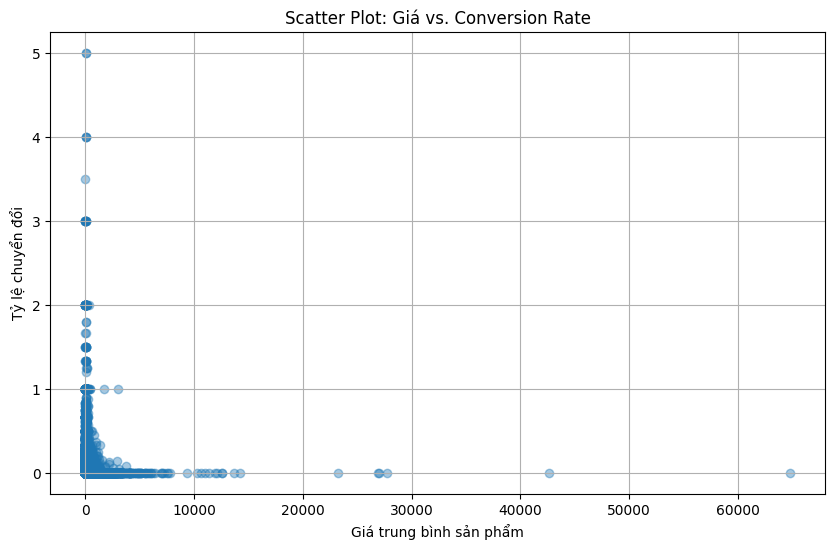

In [ ]:
import matplotlib.pyplot as plt

# Tính conversion rate theo sản phẩm
def calc_conversion(df):
    return (df['event_type'] == 'purchase').sum() / (df['event_type'] == 'view').sum()

product_cr = data.groupby('product_id').apply(calc_conversion).reset_index(name='conversion_rate')

product_price = data.groupby('product_id')['price'].mean().reset_index()
product_stats = pd.merge(product_cr, product_price, on='product_id')

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(product_stats['price'], product_stats['conversion_rate'], alpha=0.4)
plt.xlabel('Giá trung bình sản phẩm')
plt.ylabel('Tỷ lệ chuyển đổi')
plt.title('Scatter Plot: Giá vs. Conversion Rate')
plt.grid(True)

plt.show()


Chúng ta thấy mối quan hệ nghịch đảo rõ ràng:

- Khi `giá trung bình` sản phẩm tăng, `tỷ lệ chuyển đổi` (conversion rate) giảm rõ rệt.

- Đa số các sản phẩm có giá trung bình dưới 1.000 đạt tỷ lệ chuyển đổi cao hơn.

Cụm dữ liệu dày đặc ở giá thấp:

- Phần lớn sản phẩm tập trung trong khoảng giá từ 0 đến 2.000, cho thấy người dùng có xu hướng tương tác nhiều hơn với `các sản phẩm giá rẻ`.

Tỷ lệ chuyển đổi gần như bằng 0 ở mức giá cao:

- Các sản phẩm có `giá >10.000` gần như `không có` chuyển đổi (conversion rate ≈ 0), chứng tỏ rào cản giá cao `ảnh hưởng lớn` đến `hành vi mua hàng`.

Một số ngoại lệ:

- Có vài điểm lẻ với `tỷ lệ chuyển đổi cao` ở `giá thấp` có thể là những sản phẩm hot, sale mạnh, hoặc thương hiệu mạnh.